In [83]:
import numpy as np
from scipy import special
from matplotlib import pyplot as plt

class neuralNetwork:
    def __init__(self, in_nodes, hidden_nodes, out_nodes, learn_rate):
        self.__inNodes = in_nodes
        self.__hiddenNodes = hidden_nodes
        self.__outNodes = out_nodes
        self.__learnRate = learn_rate

        # the weight between input and hidden
        self.__weight1 = np.random.normal(0, pow(hidden_nodes, -0.5), (hidden_nodes, in_nodes))
        # the weight between hidden and out
        self.__weight2 = np.random.normal(0, pow(out_nodes, -0.5), (out_nodes, hidden_nodes))

        self.__activation_func = special.expit

    def train(self, inputs, target):
        """
        train neural network

        :param inputs:  like two-dimensions array,and value is in range(0,1]
        :param target:  like two-dimensions array, and the second dimensions must be equal to
                the numbers of out nodes, and in range(0,1)
        :param activation_func: acitvate function
        :return: None
        """

        inputs  = np.array(inputs, ndmin=2).T
        target = np.array(target, ndmin=2).T
        if len(target) != self.outNodes:
            raise Exception("the second dimensions must be equal to the numbers of out nodes")

        # calc outputs
        hidden_out = np.dot(self.weight1, inputs)
        hidden_out = self.activation_func(hidden_out)
        
        final_out = np.dot(self.weight2, hidden_out)
        final_out = self.activation_func(final_out)

        final_err = target - final_out

        # calcout hidden layer error(reverse broadcast)
        hidden_err = np.dot(self.weight2.T, final_err)

        # adjust weight(gradient descent )
        self.__weight2 += self.learnRate * \
                    np.dot((final_err * final_out * (1.0 - final_out)), hidden_out.T)
        self.__weight1 += self.learnRate * \
                    np.dot((hidden_err * hidden_out * (1.0 - hidden_out)), inputs.T)

    def query(self, inputs):
        """
        calc result after train neuralnetwork

        :param inputs:  like one-dimensions array,and value is in range(0,1)
        :return:        like one-dimensions array,and value is in range(0,1)
        """
        inputs = np.array(inputs, ndmin=2).T
        hidden_out = np.dot(self.weight1, inputs)
        hidden_out = self.activation_func(hidden_out)

        final_out = np.dot(self.weight2, hidden_out)
        final_out = self.activation_func(final_out)
        return final_out

    @property
    def inNodes(self):
        return self.__inNodes

    @property
    def hiddenNodes(self):
        return self.__hiddenNodes

    @property
    def outNodes(self):
        return self.__outNodes

    @property
    def learnRate(self):
        return self.__learnRate

    @property
    def weight1(self):
        return self.__weight1

    @property
    def weight2(self):
        return self.__weight2

    @property
    def activation_func(self):
        return self.__activation_func

#### 这里采用MINST的数据来训练模型
数据集可以从下面地址中下载
1. [https://pjreddie.com/media/files/mnist_train.csv](https://pjreddie.com/media/files/mnist_train.csv) 
2. [https://pjreddie.com/media/files/mnist_test.csv](https://pjreddie.com/media/files/mnist_test.csv)   
#### 首先读取、格式化csv文件

In [84]:
lines = None
with open('mnist_train.csv') as f:
    lines = f.readlines()

#### 绘制手写笔记图像

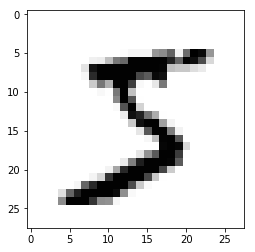

In [85]:
line = lines[0].split(',')
number = int(line[0])
images = np.asfarray(line[1:]).reshape(28,28)
plt.imshow(images, cmap='Greys', interpolation='None')

#### 旋转10度

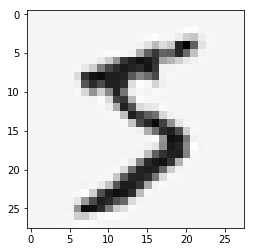

In [86]:
line = lines[0].split(',')

images = np.asfarray(line[1:]).reshape(28,28)
images_plus_10 = ndimage.rotate(images, 10, cval=0.01, reshape=False)
plt.imshow(images_plus_10, cmap='Greys', interpolation='None')

#### 可以看到，这就是MINST的手写图像笔迹，和期望值是一样的
#### 接下来，开始训练模型
#### 和上次训练不同的是，这次我们增加训练世代数，并将图像左右各旋转10度
#### 训练我们输入节点为（28*28），隐藏节点设置为100（可以自由更改），学习率设置为0.1(可以自由更改）

In [87]:
from scipy import ndimage
epoch = 5
neural = neuralNetwork(28*28, 100, 10, 0.01)
for e in range(epoch):
    for line in lines:
        line = line.split(',')
        number = int(line[0])
        target = np.zeros(10) + 0.01
        target[number] = 0.9
    
        inputs = np.asfarray(line[1:])
        inputs = inputs / 255.0 * 0.99 + 0.01
        neural.train(inputs, target)
        # rotate +10degree
    
        inputs_plus_10 = ndimage.rotate(inputs.reshape((28,28)), 10, cval=0.01, reshape=False)
        inputs_plus_10 = inputs_plus_10.reshape(28*28)
        neural.train(inputs_plus_10, target)
    
        # rotate -10degree
        inputs_mins_10 = ndimage.rotate(inputs.reshape((28,28)), -10, cval=0.01, reshape=False)
        inputs_mins_10 = inputs_mins_10.reshape(28*28)
        neural.train(inputs_mins_10, target)

#### 同样，我们使用MINST的测试数据集测试我们训练的模型
#### 并统计测试结果

In [88]:
train_data = None

with open('mnist_test.csv') as f:
    train_data = f.readlines()


In [89]:
scored = []
for line in train_data:
    line = line.split(',')
    number = int(line[0])

    inputs = np.asfarray(line[1:])
    out_res = neural.query(inputs / 255.0 * 0.99 + 0.01)
    label = np.argmax(out_res)
    if label == number:
        scored.append(1)
    else:
        scored.append(0)

In [90]:
scored = np.array(scored)
print(str.format('正确率： {0:.2%}', np.sum(scored) / len(scored)))

正确率： 96.03%


#### 还可以调整隐藏层节点以及学习率来优化我们的神经网络模型

### Reference
1. 《Python神经网络编程》 塔里克·拉希德